# Práctica Día 1: Introducción a las Series Temporales

En este notebook, aprenderemos a trabajar con datos de series temporales en Python. Veremos:

1. Configuración del entorno.
2. Configuración e importaciones
3. Creación de un dataset de ejemplo (o carga de un dataset real).
4. Exploración y descripción de los datos.
5. Visualización básica (line plot).
6. Descomposición de la serie.
7. Resampleo (agregación por periodo).
8. Tarea para los estudiantes.

## 1. Configuración del entorno

### Instalar python

#### Windows


- Descarga el instalador desde la web oficial:
🔗 https://www.python.org/downloads/windows/
- Ejecuta el instalador python-XYZ.exe y marca la casilla "Add Python to PATH".
- Haz clic en "Install Now".
- Verifica la instalación abriendo CMD y ejecutando:
```sh
python --version
```

#### Linux

```sh
sudo apt update && sudo apt install python3 python3-pip -y

python3 --version
```

### Anaconda / Conda (Windows, Linux, Mac)

```sh
conda create --name time_series_course python=3.10

conda activate time_series_course

conda install numpy pandas matplotlib

conda deactivate
```

### Entorno virtual python

#### Windows

```sh
py --version

python -m venv time_series_course

py -m venv time_series_course

time_series_course\Scripts\activate

pip install -r requirements.txt

deactivate
```

#### Linux / Mac

```sh
python3 -m venv time_series_course

. time_series_course/bin/activate

pip install -r requirements.txt

deactivate
```

## 2. Configuración e importaciones

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes para que las gráficas se vean bien en el notebook
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

print("Entorno de trabajo configurado.")

Entorno de trabajo configurado.


## 3 y 4. Creación de un dataset de ejemplo (o carga de un dataset real) y Exploración.

¿Qué son las Series Temporales?

**Definición**:  
Una serie temporal es un conjunto de observaciones ordenadas en el tiempo. 

Ejemplos:  
- El precio de una acción en la bolsa, registrado diariamente.  
- El consumo eléctrico medido cada hora.  
- La temperatura ambiente medida continuamente (cada segundo/minuto).

Las series temporales se diferencian de otros conjuntos de datos porque **el orden en el tiempo es fundamental**: el dato de *hoy* depende (o está relacionado) con el de *ayer* o con los de la semana pasada.

### Componentes principales:
1. **Tendencia (Trend)**: si la serie crece o decrece a largo plazo.  
2. **Estacionalidad (Seasonality)**: patrones cíclicos que se repiten de forma regular (diaria, semanal, anual).  
3. **Ciclos (Cycles)**: fluctuaciones que no tienen un periodo fijo como la estacionalidad (ej.: ciclos económicos).  
4. **Ruido (Noise)**: variabilidad no explicada por las partes anteriores, a menudo aleatoria.


En esta parte, generaremos un dataset de ejemplo con:
- Un índice de fechas (1 año completo de datos, por ejemplo).
- Una columna que represente una métrica (p.ej. consumo energético, ventas, etc.).
- Una posible estacionalidad y tendencia simuladas.

Si deseas usar un dataset real, reemplaza el siguiente bloque de código por:
```python
# df = pd.read_csv('ruta_a_tu_dataset.csv', parse_dates=['columna_de_fecha'], index_col='columna_de_fecha')


In [7]:
# Sección 1: Generación de datos simulados

# Creamos un rango de fechas diario en 2024
date_rng = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Simulamos tendencia y estacionalidad
# Tendencia: vamos a aumentar el valor con el paso de los días
# Estacionalidad: crearemos un patrón mensual

np.random.seed(42)  # Fijamos semilla para resultados reproducibles

# Longitud del rango de fechas
n = len(date_rng)

# Simulamos una tendencia lineal: por ejemplo, inicia en 100 y aumenta un poco cada día
trend = 100 + np.arange(n) * 0.1  # La pendiente es 0.1 por día

# Creamos una estacionalidad mensual, usando una onda sinusoidal con periodo ~30 días
seasonality = 10 * np.sin(2 * np.pi * np.arange(n) / 30)

# Ruido aleatorio
noise = np.random.normal(0, 5, n)

# Serie final = tendencia + estacionalidad + ruido
values = trend + seasonality + noise

# Creamos el DataFrame
df = pd.DataFrame({'Consumo': values}, index=date_rng)

# Revisamos las primeras filas
df.head()

,Consumo
2024-01-01,102.483571
2024-01-02,101.487795
2024-01-03,107.505809
2024-01-04,113.793002
2024-01-05,106.660681


Observamos que:
- El índice son fechas diarias (`DatetimeIndex`).
- Tenemos una sola columna llamada `consumo`.

In [8]:
# Verificamos la estructura
print("Dimensiones del DataFrame:", df.shape)
df.info()


Dimensiones del DataFrame: (366, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Consumo  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [10]:
# Descripción estadística de los datos
df.describe()

,Consumo
count,366.000000
mean,118.370935
std,13.589101
min,85.231040
25%,108.088660
50%,118.200654
75%,128.229802
max,147.282168


## 5. Visualización básica (line plot).

Haremos un gráfico de líneas para ver la evolución de la columna `consumo` a lo largo del tiempo.

<Figure size 1200x500 with 0 Axes>

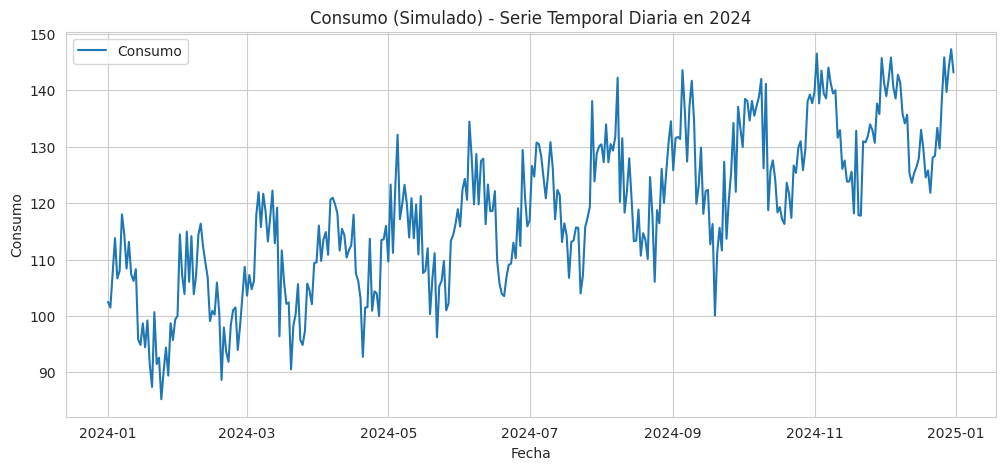

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Consumo'], label='Consumo')
plt.title('Consumo (Simulado) - Serie Temporal Diaria en 2024')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Podemos ya observar una tendencia creciente (ligera) y algunas fluctuaciones que podrían corresponder a la estacionalidad introducida, además de ruido aleatorio.

## 6. Descomposición de la serie.

Statsmodels proporciona métodos para descomponer una serie en sus componentes principales:
- Tendencia
- Estacionalidad
- Ruido (o residuales)

*Nota:* Esta parte es opcional si todavía no se ha introducido Statsmodels. Pero sirve para ilustrar cómo ver visualmente cada componente.

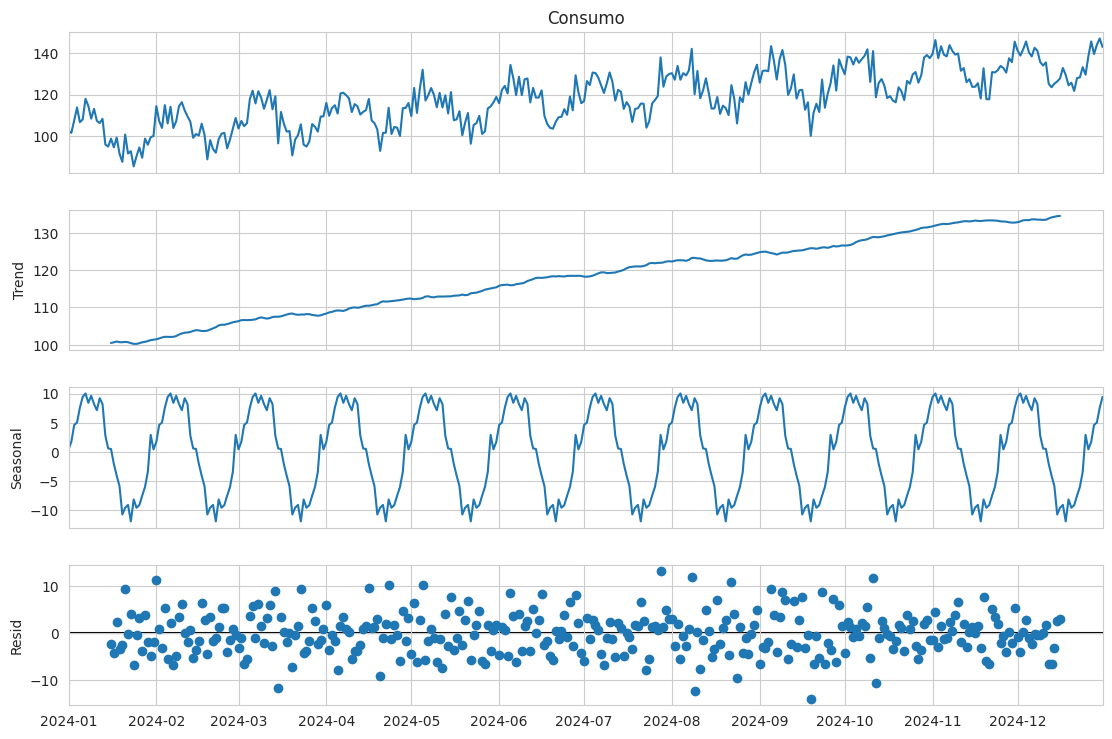

In [14]:
import statsmodels.api as sm

# Para series diarias con estacionalidad mensual, establecemos period ~ 30
decomposition = sm.tsa.seasonal_decompose(df['Consumo'], model='additive', period=30)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

En la gráfica resultante, veremos:

- **Observed** (la serie original)
- **Trend** (la tendencia estimada)
- **Seasonal** (el patrón estacional aproximado)
- **Resid** (la parte que queda sin explicar, es decir, el ruido)


## 7. Resampleo (agregación por periodo).

Supongamos que ahora queremos observar un promedio semanal o un total semanal de `consumo`. Podemos usar la función `resample` de Pandas.

In [15]:
# Sección 7: Resampleo
# Agrupamos por semana la media de consumo

df_weekly = df.resample('W').mean()  # 'W' indica resample semanal
df_weekly.head()


,Consumo
2024-01-07,108.275294
2024-01-14,107.662600
2024-01-21,95.237248
2024-01-28,91.708588
2024-02-04,105.079597


<Figure size 1200x500 with 0 Axes>

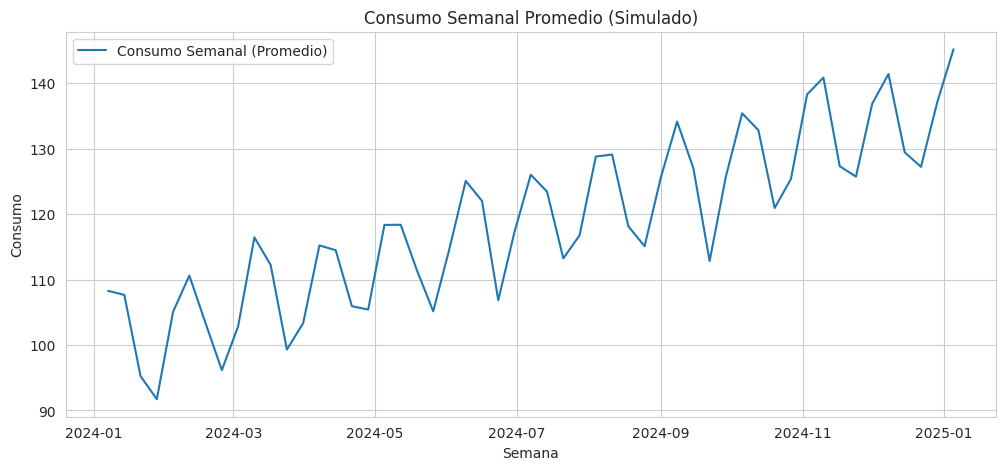

In [17]:
# Visualización de la serie semanal
plt.figure(figsize=(12, 5))
plt.plot(df_weekly.index, df_weekly['Consumo'], label='Consumo Semanal (Promedio)')
plt.title('Consumo Semanal Promedio (Simulado)')
plt.xlabel('Semana')
plt.ylabel('Consumo')
plt.legend()
plt.show()

Observa cómo al agrupar (resample) por semana:
- Se suavizan un poco las fluctuaciones diarias.
- Se puede apreciar la tendencia con menos ruido.

## 8 Ejemplo con un dataset real

In [ ]:
# Sección 4: Carga de datos continuos (velocidad del viento)
# Ejemplo: dataset real de viento (formato CSV) con mediciones cada 10 minutos
# URL de ejemplo (puedes usar un dataset real de NOAA o Kaggle)

data_continuous_url = "https://raw.githubusercontent.com/tu-usuario/tu-repo/main/wind_10min.csv"

try:
    df_wind = pd.read_csv(data_continuous_url, parse_dates=["timestamp"], index_col="timestamp")
except:
    # Generamos datos sintéticos si no existe
    import datetime
    date_range_10min = pd.date_range("2023-01-01 00:00:00", periods=144, freq="10min")  # 1 día, 10 min freq = 144 muestras
    np.random.seed(42)
    wind_speed_sint = np.random.uniform(0, 10, size=len(date_range_10min))  # random speed 0-10 m/s
    df_wind = pd.DataFrame({"timestamp": date_range_10min, "wind_speed": wind_speed_sint}).set_index("timestamp")

df_wind.head()


,wind_speed
timestamp,
2023-01-01 00:00:00,3.745401
2023-01-01 00:10:00,9.507143
2023-01-01 00:20:00,7.319939
2023-01-01 00:30:00,5.986585
2023-01-01 00:40:00,1.560186


Aquí cada registro corresponde a una medición de la velocidad del viento en un cierto lugar, cada 10 minutos. Estos datos se acercan más a lo “continuo”, pues en teoría podríamos tomar la velocidad en **cualquier** momento, aunque en la práctica se muestrea.

### Exploración y Visualización

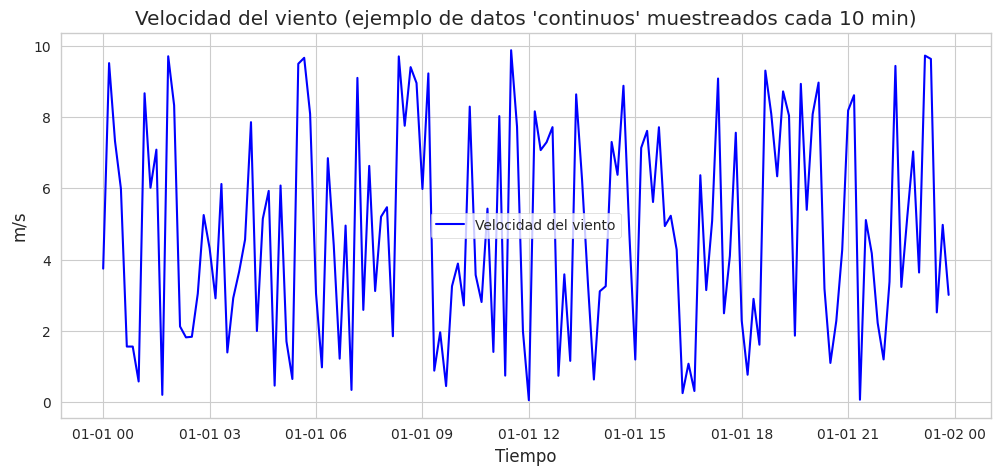

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df_wind.index, df_wind["wind_speed"], linestyle="-", color="blue", label="Velocidad del viento")
plt.title("Velocidad del viento (ejemplo de datos 'continuos' muestreados cada 10 min)")
plt.xlabel("Tiempo")
plt.ylabel("m/s")
plt.legend()
plt.show()

**Comentario**:
- Notamos que la frecuencia de muestreo es más alta que en un dataset diario.  
- Si muestreáramos a 1 Hz (cada segundo), se parecería aún más a un caso **casi continuo**.

---

## Identificación de Componentes (Tendencia, Estacionalidad, Ruido)

Aunque no hagamos un análisis profundo en esta clase, podemos echar un vistazo rápido a la existencia (o no) de tendencia y estacionalidad en estos datos.  

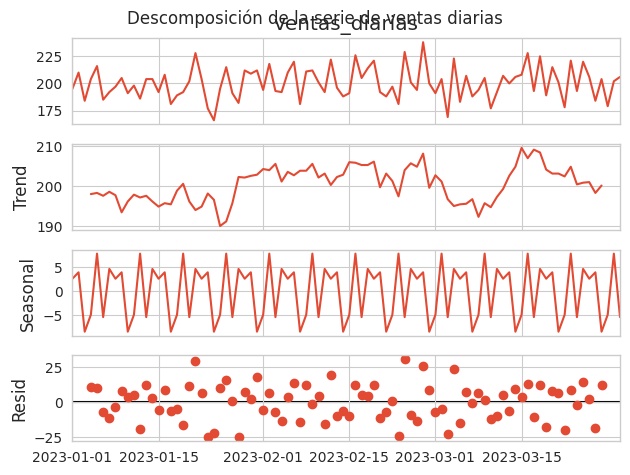

In [ ]:
import statsmodels.api as sm

# Para ventas diarias (discretos)
df_ventas_resample = df_ventas.resample("D").sum()  # ya está diario, pero por si acaso
df_ventas_resample.dropna(inplace=True)

# Descomposición rápida (si tu dataset es más largo se ve mejor)
try:
    decomposition_ventas = sm.tsa.seasonal_decompose(df_ventas_resample["ventas_diarias"], model="additive", period=7)
    decomposition_ventas.plot()
    plt.suptitle("Descomposición de la serie de ventas diarias")
    plt.show()
except:
    print("No se pudo descomponer - probablemente dataset muy corto o period inadecuado.")


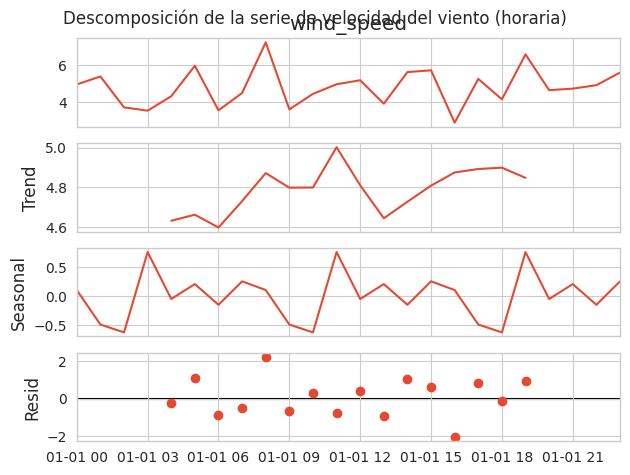

In [ ]:
# Para wind speed (continuos), suponiendo un dataset lo suficientemente largo y con muestreo regular
# period=144 => cada 10 min en un día, si queremos buscar repetición diaria
df_wind_resample = df_wind.resample("h").mean()
df_wind_resample.dropna(inplace=True)

try:
    decomposition_wind = sm.tsa.seasonal_decompose(df_wind_resample["wind_speed"], model="additive", period=8)
    decomposition_wind.plot()
    plt.suptitle("Descomposición de la serie de velocidad del viento (horaria)")
    plt.show()
except:
    print("No se pudo descomponer - dataset corto o period inadecuado.")


**Interpretación** (si la descomposición funciona):
- **Tendencia**: ¿aumenta o disminuye la velocidad/ventas?  
- **Estacionalidad**: patrones cíclicos (ej.: sube el viento por la tarde, bajas ventas en fin de semana).  
- **Resid**: lo que no se explica por lo anterior (ruido).

---

## 9. Datos discretos en series temporales

En los ejemplos anteriores trabajamos con datos **continuos** (como temperaturas, precios de acciones, etc.). Ahora veremos **datos discretos** en series temporales.

Los datos discretos son aquellos que solo pueden tomar ciertos valores específicos, como:
- Número de clientes que ingresan a una tienda cada hora.
- Cantidad de ventas por día.
- Número de fallos en una máquina por mes.

Ejemplo de serie temporal con datos discretos:

Este gráfico muestra cómo representar datos discretos en series temporales utilizando un **gráfico de barras** en lugar de una línea.

---

In [3]:
# Sección 3: Carga de datos discretos (ventas diarias)

# Ejemplo ficticio (puedes reemplazar con un dataset real de Kaggle u Open Data)
data_discrete_url = "https://raw.githubusercontent.com/tu-usuario/tu-repositorio/main/ventas_diarias.csv"

try:
    df_ventas = pd.read_csv(data_discrete_url, parse_dates=["fecha"], index_col="fecha")
except:
    # Generaremos datos sintéticos si no existe
    import datetime
    date_range = pd.date_range("2023-01-01", periods=90, freq="D")
    np.random.seed(42)
    ventas_sint = np.random.poisson(lam=200, size=len(date_range))
    df_ventas = pd.DataFrame({"fecha": date_range, "ventas_diarias": ventas_sint}).set_index("fecha")

df_ventas.head()


,ventas_diarias
fecha,
2023-01-01,195
2023-01-02,210
2023-01-03,184
2023-01-04,204
2023-01-05,216


Observamos que la columna `ventas_diarias` refleja **datos discretos** por día. 

In [4]:
# Descripción básica
print("Dimensiones:", df_ventas.shape)
df_ventas.describe()

Dimensiones: (90, 1)


,ventas_diarias
count,90.000000
mean,200.344444
std,14.585017
min,166.000000
25%,191.000000
50%,200.500000
75%,209.750000
max,238.000000


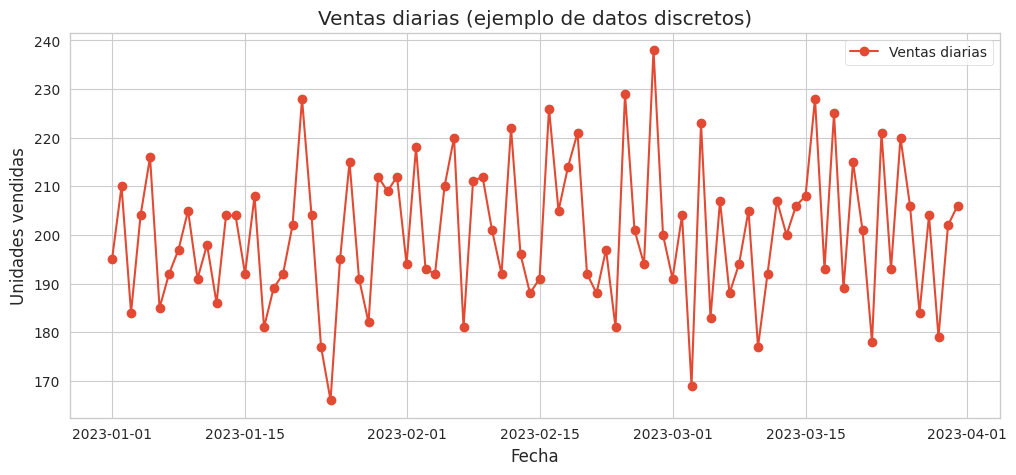

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df_ventas.index, df_ventas["ventas_diarias"], marker="o", linestyle="-", label="Ventas diarias")
plt.title("Ventas diarias (ejemplo de datos discretos)")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")
plt.legend()
plt.show()

**Discusión**:  
- Se ve que cada punto corresponde a un día.  
- Es un caso típico de **datos discretos** en series temporales.

---


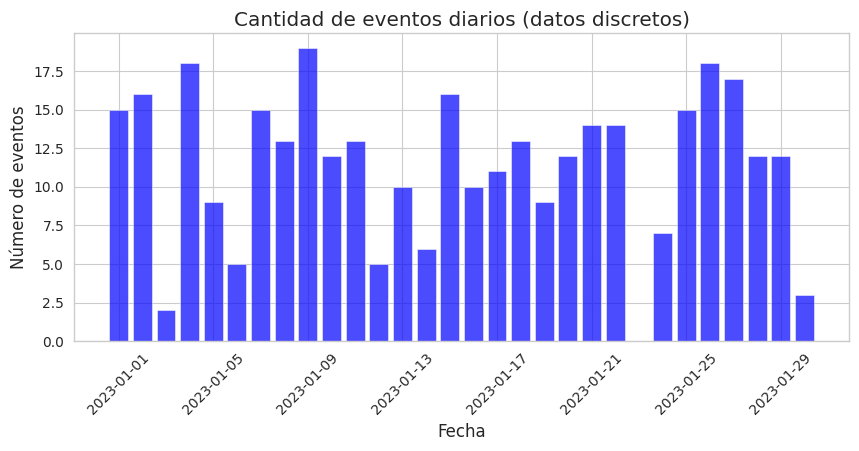

In [2]:
# Crear una serie de datos discretos (cantidad de eventos por día)
fechas = pd.date_range(start="2023-01-01", periods=30, freq="D")
eventos = np.random.randint(0, 20, size=30)  # Número de eventos diarios

serie_discreta = pd.DataFrame({"Fecha": fechas, "Eventos": eventos})
serie_discreta.set_index("Fecha", inplace=True)

# Visualización
plt.figure(figsize=(10, 4))
plt.bar(serie_discreta.index, serie_discreta["Eventos"], color="blue", alpha=0.7)
plt.title("Cantidad de eventos diarios (datos discretos)")
plt.xlabel("Fecha")
plt.ylabel("Número de eventos")
plt.xticks(rotation=45)
plt.show()

## 10. Tarea para los estudiantes.

### Conclusiones
- Hemos creado (o cargado) un dataset con fechas como índice.
- Exploramos la estructura (shape, info, describe).
- Graficamos la serie temporal para identificar posibles patrones (tendencia, estacionalidad, ruido).
- Vimos un ejemplo de descomposición usando `statsmodels`.
- Realizamos un resampleo semanal para suavizar y observar mejor la tendencia.

### Tarea

1. **Buscar un dataset de series temporales** (real) en alguna fuente pública (Kaggle, datos abiertos, etc.) o usar uno proporcionado por el profesor.
2. **Cargar el dataset** en un DataFrame con `parse_dates` y `index_col` (o convertir la columna de fecha a `datetime`).
3. **Explorar**:
   - Dimensiones, tipos de datos (`.info()`, `.dtypes`).
   - Estadísticas descriptivas (`.describe()`).
4. **Visualizar** la columna principal (o columnas) en un gráfico de líneas.
5. **Interpretar** si hay tendencia o estacionalidad aparente.
6. **(Opcional)** Aplicar descomposición estacional y comentar los hallazgos.
7. **(Opcional)** Hacer un resampleo diario, semanal o mensual para comparar.

¡Felicidades! Con esto concluye la práctica del Día 1.
